In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hmac
import hashlib
from datetime import datetime, timedelta
from math import pow, floor

from selenium import webdriver
from selenium.webdriver.common.keys import Keys # send keys like: Keys.ENTER

from selenium.webdriver.common.by import By # find_element_by_xpath == find_element(By.XPATH, "//div[@class='entries']/*")
from selenium.webdriver.support.ui import WebDriverWait # Explicit waits
from selenium.webdriver.support import expected_conditions as EC #conditionits for explicit waits

pd.set_option('max_colwidth', 70)

print('do')

do


In [2]:
def divisible(hash_hmac, mod):

#    print(f">>> divisible({hash_hmac}, {mod})")

    val_i = 0
    val_f = 0
    # print(f"estanciando val = {val_i}")
    o = len(hash_hmac) % 4
    # print(f"estanciando o = len(hash_hmac) % 4 = {o}")

    if o > 0:
        o -= 4
        print(f"WARNING: [ o > 0 = True ]   value of 'o' is '{o}'")

#    print(f">>> for x in range(0,{len(hash_hmac)},4):")

    df1 = pd.DataFrame(data={}, columns=["x", "val_i", "bitwised", "hex_hash", "int_hash", "val_f", "== 0"])
    for x in range(0,len(hash_hmac),4):
        # print(f"x = {x}     val = {val_i}")
        # print(f"val_f = ((val_i << 16) + int({hash_hmac[x:x+4]},16)) % mod")
        # print(f"val_f = ({val_i << 16} + {int(hash_hmac[x:x+4],16)}) % {mod}")

        val_f = ((val_i << 16) + int(hash_hmac[x:x+4],16)) % mod

        df1 = df1.append(
                pd.Series([
                    x,
                    val_i,
                    val_i<<16,
                    hash_hmac[x:x+4],
                    int(hash_hmac[x:x+4],16),
                    val_f,
                    val_f==0
                    ],
                    index=df1.columns),
                ignore_index=True)

        val_i = val_f
    #print(df1)
    return [val_i == 0, df1["== 0"]]

In [3]:
def getPoint(hash_hmac):
#    print("Inicio GETPOINT()")

#    print(f"{hash_hmac} é divisível por 15?")
    test = divisible(hash_hmac, 15)
    if test[0]:
#        print("Sim, então:")
#        print(f"""CRASH: 0\
#
#
#        """)
        return 0
#    print("Não então:")
    h = int(hash_hmac[0:int(52/4)], 16)
    e = int(pow(2, 52))
#    print(f"proporção h/e: {(h/e)*100:.3f}%")
#    print(f"estanciando h = int({hash_hmac[0:int(52/4)]}) = {h:,} ({(h/e)*100:.3f}%)")
#    print(f"estanciando e = int(pow(2, 52)) = {e:,} (100%)")


    # print(f'point = float(format((floor((100 * {e:,} - {h:,}) / ({e:,} - {h:,})) / 100), ".2f"))')

    # print(f'((100 * {e:,} - {h:,}) / ({e:,} - {h:,})) / 100')
    # print(f'(({100*e:,} - {h:,}) / ({e-h:,})) / 100')
    # print(f'({100*e-h:,} / {e-h:,}) / 100')
    # print(f'floor({(100*e-h) / (e-h):,}) / 100')
    # print(f'{floor((100*e-h) / (e-h))} / 100')

#    print(f'((100 * 1 - {h/e:.3f}) / (1 - {h/e:.3f})) / 100')
#    print(f'((100 - {h/e:.3f}) / {1 - (h/e):.3f}) / 100')
#    print(f'({100 - (h/e):.3f} / {1 - (h/e):.3f}) / 100')
#    print(f'floor({(100 - (h/e)) / (1 - (h/e)):.3f}) / 100')

    point = float(format((floor((100 * e - h) / (e - h)) / 100), ".2f"))
#    print(f"""CRASH: {point}\
#
#
#    """)
    return [point,
            int(''.join(str(e) for e in [int(not(e)) for e in list(map(int, test[1].to_numpy()))]), 2),
            ''.join(str(e) for e in [int(not(e)) for e in list(map(int, test[1].to_numpy()))]),
            (h/e)*100]

In [4]:
def seed(hash, amount=9):
    chain = [hash]
    for x in range(amount):
        chain.append(hashlib.sha256(str.encode(chain[x])).hexdigest())
        #print(len(chain),chain[len(chain)-1])
    return pd.Series(chain)
        
seeds = seed('5f5f9da7af0feedcb21a3cf96917df0788b895b09499977e1d23e4710d71bb05')
seeds[0]

'5f5f9da7af0feedcb21a3cf96917df0788b895b09499977e1d23e4710d71bb05'

In [5]:
def hashes(seed_series):
    client_seed = "0000000000000000000415ebb64b0d51ccee0bb55826e43846e5bea777d91966"
    hmacs = []
    crashes = []
    inIntFromBin = []
    inBin = []
    scale = []
    
    for seed in seed_series:
        #print(f'hash_hmac = hmac.new(str.encode(seed), str.encode(client_seed), hashlib.sha256).hexdigest()')
        #print(f'hash_hmac = hmac.new({str.encode(seed)}, {str.encode(client_seed)}, hashlib.sha256).hexdigest()')
        hash_hmac = hmac.new(str.encode(seed), str.encode(client_seed), hashlib.sha256).hexdigest()
        hmacs.append(hash_hmac)

        point = getPoint(hash_hmac)
        crashes.append(point[0])
        inIntFromBin.append(point[1])
        inBin.append(point[2])
        scale.append(point[3])
        
    return pd.DataFrame({
                         'crashes':crashes,
                         'seeds':seed_series,
                         'hmacs':hmacs,
                         'dec':inIntFromBin,
                         'bin':inBin,
                         'scale':scale
                        })

z = hashes(seeds)
print(z)

   crashes                                                             seeds  \
0     4.06  5f5f9da7af0feedcb21a3cf96917df0788b895b09499977e1d23e4710d71bb05   
1     1.16  7aaf90ac37ed69f552b9841eb1f9b996b2b5e6cfbcc8775fc136e4af0091318c   
2     4.32  dece818276710176152ea9548d4539e0e3a9aaf7883b23d91fd61775194d9073   
3     1.17  43cf1abd23b158e9bb7fcc4546a208295c6e4cb9362a769c72efdb46ac75a2c5   
4     2.21  954a061f5450c6980823785ac7d121a1ad2dbd648380c856ba1e7c6f8976731f   
5     1.66  acc6f156795e5695923591c845ea8bbec46591dfe908b56b8b14ed7cb77ca48e   
6     1.12  23109a1a414997c736b8a91e9fbaa900a3708c998ef3838dda82628260b74b09   
7     3.72  b0a36425d33e09d330d165de3dee4ba43ec9be4b49d58f2e13d346abea373b08   
8     2.52  a5928ec46d37d46bf4e7d42b832a03471cd69310d55afccca529c16e5e9e0bf3   
9     1.96  b9456c54db29eefd2d711a5191a74e37d4c5ea7e2dc81bb1f4aea1e72f0609c0   

                                                              hmacs    dec  \
0  c191a357c9bbc2497189824bf68ed649df2e28

In [6]:
f"{(int('25fb', 16)/int('ffff', 16)) - (int('25fa', 16)/int('ffff', 16)):.18f}"

'0.000015259021896696'

In [7]:
((int('25fb', 16)/int('ffff', 16)) - (int('25fa', 16)/int('ffff', 16)))*15

0.0002288853284504455

In [8]:
for x in range(15):
    print(f"{9735+x} --> {f'{hex(9735+x)}'[2:]} --> {(9735+x)/int('ffff', 16)} --> {(9735+x)%15} --> {((9735+x)%15)<<16}")

9735 --> 2607 --> 0.14854657816433967 --> 0 --> 0
9736 --> 2608 --> 0.14856183718623636 --> 1 --> 65536
9737 --> 2609 --> 0.14857709620813306 --> 2 --> 131072
9738 --> 260a --> 0.14859235523002975 --> 3 --> 196608
9739 --> 260b --> 0.14860761425192645 --> 4 --> 262144
9740 --> 260c --> 0.14862287327382315 --> 5 --> 327680
9741 --> 260d --> 0.14863813229571984 --> 6 --> 393216
9742 --> 260e --> 0.14865339131761654 --> 7 --> 458752
9743 --> 260f --> 0.14866865033951324 --> 8 --> 524288
9744 --> 2610 --> 0.14868390936140993 --> 9 --> 589824
9745 --> 2611 --> 0.14869916838330663 --> 10 --> 655360
9746 --> 2612 --> 0.14871442740520333 --> 11 --> 720896
9747 --> 2613 --> 0.14872968642710002 --> 12 --> 786432
9748 --> 2614 --> 0.14874494544899672 --> 13 --> 851968
9749 --> 2615 --> 0.14876020447089341 --> 14 --> 917504


In [9]:
int('ffff', 16)

65535

In [10]:
(14<<16) + int('ffff', 16)

983039

In [11]:
int(b'1111111110111110', 2)

65470

In [12]:
s = pd.Series(
    [
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    True,
    False,
    False,
    False,
    False,
    False,
    False,
    False,
    ]
)


int(''.join(str(e) for e in [int(not(e)) for e in list(map(int, s.to_numpy()))]), 2)

65407

In [13]:
[int(not(e)) for e in list(map(int, s.to_numpy()))]

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1]

In [14]:
''.join(str(e) for e in [int(not(e)) for e in list(map(int, s.to_numpy()))])

'1111111101111111'

In [15]:
aleatory_captured_hashes = [
    '9e3548f370097ea623ddc9b22b338fb26878c5fba7244eb464f55af2a9656dc5', #13.56 KV16dnWXlB jogada em 13/10/2021 4:03 pm
    'abe6ad5995d75c77aab270d3a1efca1aad4ada36e09a6a632fc0ed547ab9a6a7', # 1.00 8Lkn32Mbl3 jogada em 13/10/2021 4:19 pm
    'c43ed26d1c1f60f31ab5888b5c290c2dbda6c293c160bfeadee6f4569a276c4d', # 4.25            jogada em 10/10/2021 5:39 pm
]

rexi = hmac.new(
        str.encode(aleatory_captured_hashes[0]), 
        str.encode("0000000000000000000415ebb64b0d51ccee0bb55826e43846e5bea777d91966"), 
        hashlib.sha256
        ).hexdigest()
    
print(rexi)

ed4cf2ea5eaa5e89dd5e9443a7817b3ed4c3f3105e70b67aa10d4aa4415166a9


In [16]:
class Divisible:
    def __init__(self, hashHmac=None, mod=15):
        self.hash = hashHmac
        self.mod = mod
        self.df = pd.DataFrame(
                data={},
                columns=[
                    "x",
                    "val_i",
                    "bitwised",
                    "hex_hash",
                    "int_hash",
                    "bit+int",
                    "val_f",
                    "!= 0"
                ])
        self.check_divisible()

    def check_divisible(self):
        vali, valf, o = (0, 0, len(self.hash)%4)
        o -= 4 if o > 0 else o

        for x in range(0, len(self.hash), 4):
            valf = ((vali << 16) + int(self.hash[x:x+4], 16)) % self.mod
            self.df = self.df.append(
                    pd.Series(
                        data=[
                            x,
                            vali,
                            vali << 16,
                            self.hash[x:x+4],
                            int(self.hash[x:x+4], 16),
                            (vali << 16) + int(self.hash[x:x+4], 16),
                            valf,
                            int(valf != 0)
                        ],
                        index=self.df.columns
                    ),
                    ignore_index=True)
            vali = valf
        
        self.divisible = vali == 0
        self.bined = ''.join(str(e) for e in self.df['!= 0'])
        self.hexed = ''.join([hex(e)[2:] for e in self.df['val_f']])

In [17]:
u = Divisible(rexi)

print(u.df)
print(u.divisible)
print(u.bined)
print(u.hexed)

     x val_i bitwised hex_hash int_hash bit+int val_f != 0
0    0     0        0     ed4c    60748   60748    13    1
1    4    13   851968     f2ea    62186  914154     9    1
2    8     9   589824     5eaa    24234  614058     3    1
3   12     3   196608     5e89    24201  220809     9    1
4   16     9   589824     dd5e    56670  646494     9    1
5   20     9   589824     9443    37955  627779    14    1
6   24    14   917504     a781    42881  960385    10    1
7   28    10   655360     7b3e    31550  686910     0    0
8   32     0        0     d4c3    54467   54467     2    1
9   36     2   131072     f310    62224  193296     6    1
10  40     6   393216     5e70    24176  417392     2    1
11  44     2   131072     b67a    46714  177786     6    1
12  48     6   393216     a10d    41229  434445     0    0
13  52     0        0     4aa4    19108   19108    13    1
14  56    13   851968     4151    16721  868689     9    1
15  60     9   589824     66a9    26281  616105    10   

In [18]:
u.df.iat[-2, 3]

'4151'

In [19]:
print(''.join(str(e) for e in u.df['!= 0']))

myHex = ''.join([hex(e)[2:] for e in u.df['val_f']])
myHexInt = int(myHex, 16)
myTotal = int("eeeeeeeeeeeeeeee", 16)
print(myHex)
print(f'{myHexInt:,}')
print(f'{myTotal:,}')
print((myHexInt/myTotal)*100)

1111111011110111
d9399ea026260d9a
15,652,716,390,574,853,530
17,216,961,135,462,248,174
90.91451312121815


In [20]:
class Crash():
    def __init__(self, hashHmac):
        self.hash = hashHmac
        self.d = Divisible(self.hash, 15)
        self.h = int(self.hash[0:int(52/4)], 16)
        self.e = int(pow(2, 52))
        self.point = float(format((floor((100 * self.e - self.h) / (self.e - self.h)) / 100), ".2f"))
        self.scale = (self.h/self.e) * 100
        self.decbin = (int(self.d.bined, 2) / int(''.join('1' for item in range(16)), 2)) * 100
        self.dechex = (int(self.d.hexed, 16)/ int(''.join('e' for item in range(16)), 16)) * 100
        self.zero = 0
        self.good = 0
        if self.d.divisible:
            self.zero = self.point
            self.point = 0
        if self.point >= 2:
            self.good = 1

In [21]:
class Crexi(Divisible):
    pass

In [22]:
r = Crexi(rexi)
r.hash

'ed4cf2ea5eaa5e89dd5e9443a7817b3ed4c3f3105e70b67aa10d4aa4415166a9'

In [23]:
w = Crash(rexi)

wkeys = ['bina', 'd', 'deci', 'e', 'h', 'hash', 'point', 'scale', 'zero', 'good']

print(w.d.bined)
print(w.d.divisible)
print(w.decbin)
print(w.dechex)
print(w.e)
print(w.h)
print(w.hash)
print(w.point)
print(w.zero)
print(w.scale)
txt = 'good' if w.good else 'bad'
print(txt)
print(w.d.df)

1111111011110111
False
99.59716182192722
90.91451312121815
4503599627370496
4174635979893413
ed4cf2ea5eaa5e89dd5e9443a7817b3ed4c3f3105e70b67aa10d4aa4415166a9
13.56
0
92.69553968612539
good
     x val_i bitwised hex_hash int_hash bit+int val_f != 0
0    0     0        0     ed4c    60748   60748    13    1
1    4    13   851968     f2ea    62186  914154     9    1
2    8     9   589824     5eaa    24234  614058     3    1
3   12     3   196608     5e89    24201  220809     9    1
4   16     9   589824     dd5e    56670  646494     9    1
5   20     9   589824     9443    37955  627779    14    1
6   24    14   917504     a781    42881  960385    10    1
7   28    10   655360     7b3e    31550  686910     0    0
8   32     0        0     d4c3    54467   54467     2    1
9   36     2   131072     f310    62224  193296     6    1
10  40     6   393216     5e70    24176  417392     2    1
11  44     2   131072     b67a    46714  177786     6    1
12  48     6   393216     a10d    41229  434

In [24]:
class Blaze:
    def __init__(self, list=[]):
        
        opt = webdriver.ChromeOptions()
        opt.add_experimental_option('excludeSwitches', ['enable-logging']) # disable "Devtools listening on..."
        #opt.headless = True
        
        self.driver = webdriver.Chrome(options=opt)
        self.wait = WebDriverWait(self.driver, 10)
        self.driver.get("https://blaze.com/pt/games/crash")
        self.driver.execute_script("document.body.style.zoom='0.7'")
        print("Ok, ready to go now!")

        self.list = list
        self.nlist = len(self.list)
        self.listCrashes()

        self.openModal()
        self.hash = self.setHash()
        self.factor = self.setFactor()
        self.closeModal()

    def listCrashes(self):
        self.wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "div.entries")))
        lista = self.driver.find_elements_by_css_selector("div.entries span")
        lista.reverse()
        for x in range(len(lista)):
            lista[x] = float(lista[x].get_attribute("innerHTML")[:-1])
            #print(lista[x])
        self.list = lista
        self.nlist = len(self.list)

    def openModal(self):
        print("wait until <div.entries> visibility")
        self.wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "div.entries")))
        print("<div.entries> located, execute js click script")
        self.driver.execute_script("document.querySelector('div.entries span').click()") #open modal of last crash
        print("wait until <div.server-roll div> visibility")
        self.wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, "div.server-roll div")))
        print("modal open completed, hash located:")

    def setHash(self):
        return self.driver.find_element_by_css_selector("div.server-roll div").text #get hash on modal of last crash
    
    def setFactor(self):
        return float(self.driver.find_element_by_css_selector("div.entries span").get_attribute("innerHTML")[:-1]) #get str of crash, like 1.23X
    
    def closeModal(self):
        self.driver.execute_script("document.querySelector('div.close').click()")

    def listen(self, ntimes=5):
        ntimes += self.nlist
        self.stamps = pd.DataFrame(data={}, columns=['crash', 'reg', 'duration'])
        while self.nlist < ntimes:
            newList = self.driver.find_elements_by_css_selector("div.entries span")
            newList.reverse()
            current = len(newList)
            
            if current > self.nlist:
                for y in range(current-self.nlist):
                    self.list.append(float(newList[y-(current-self.nlist)].get_attribute("innerHTML")[:-1]))
                    self.tstamps.append(datetime.now())
                    print(self.tstamps[-1:])
                    print(self.list[y-(current-self.nlist)])
                self.nlist = current

    def listen2(self):
        print('Press Ctrl-C to quit.')
        try:
            while True:
                newList = self.driver.find_elements_by_css_selector("div.entries span")
                print(newList[0].get_attribute("innerHTML"),' ', end='\r')
                
                
        except KeyboardInterrupt:
            print('\n')

In [25]:
class LearnBlaze:
    def __init__(self, hashFromCrashPoint):
        self.client_seed = "0000000000000000000415ebb64b0d51ccee0bb55826e43846e5bea777d91966"
        self.maxHash = int(''.join('f' for item in range(64)), 16)
        #self.maxHmac = int(''.join('e' for item in range(64)), 16)
        self.seed = hashFromCrashPoint
        self.data = {
            "good":[],
            "point":[],
            "zeros":[],
            "seeds":[self.seed],
            "hmacs":[],
            "divbin":[],
            "divhex":[],
        }
        
        self.genSeeds()
        self.genHmacs()
        self.genPoints()
        self.numerize()
        
    def genSeeds(self, n=10000):
        # first, n seeds are needed
        for x in range(n):
            (
                self.data["seeds"]
                .append(hashlib
                        .sha256(str.encode(self.data["seeds"][x]))
                        .hexdigest())
            )
        self.data["seeds"].reverse()
        
    def genHmacs(self):
        #hmacs for each seed
        for seed in self.data["seeds"]:
            (
                self.data["hmacs"]
                .append(
                    hmac.new(
                        str.encode(seed),
                        str.encode(self.client_seed),
                        hashlib.sha256
                    ).hexdigest()
                )
            )
    
    def genPoints(self):
        for eachmac in self.data["hmacs"]:
            crash = Crash(eachmac)
            self.data["point"].append(crash.point)
            self.data["good"].append(crash.good)
            self.data["zeros"].append(crash.zero)
            self.data["divbin"].append(crash.decbin)
            self.data["divhex"].append(crash.dechex)
                
    def numerize(self):
        seeds = self.data["seeds"]
        hmacs = self.data["hmacs"]
        for x in range(len(seeds)):
            seeds[x] = (int(seeds[x], 16) / self.maxHash) * 100
            
        for y in range(len(hmacs)):
            hmacs[y] = (int(hmacs[y], 16) / self.maxHash) * 100
"""
j = LearnBlaze(aleatory_captured_hashes[0])
hf = pd.DataFrame(j.data)
print(hf)
"""


'\nj = LearnBlaze(aleatory_captured_hashes[0])\nhf = pd.DataFrame(j.data)\nprint(hf)'

In [30]:
#hf.to_pickle('./jdata.pkl')
hf = pd.read_pickle('./jdata.pkl')
hf

,good,point,zeros,seeds,hmacs,divbin,divhex
0,1,7.76,0.00,94.350773,87.237314,73.827726,40.459303
1,1,2.28,0.00,56.263349,56.463777,100.000000,98.910005
2,1,4.71,0.00,18.070639,78.964891,43.749142,5.310345
3,0,1.14,0.00,66.366223,12.721323,74.218357,80.692151
4,0,1.47,0.00,49.218056,32.328734,96.874952,41.504518
...,...,...,...,...,...,...,...
9996,0,1.01,0.00,27.905567,1.735060,93.542382,84.333442
9997,1,9.57,0.00,96.194418,89.645054,99.993896,62.811496
9998,0,1.07,0.00,22.289025,6.942892,100.000000,35.825562
9999,0,0.00,1.99,91.328709,50.027046,99.992370,71.216862


In [32]:
last100, justGoods, justBads = ([], [], [])
for x in range(10001-100):
    last100.append(hf.good[x:100+x].sum())
    justGoods.append(hf.good[:100+x].sum())
    justBads.append((100+x) - hf.good[:100+x].sum())
    
tn = pd.DataFrame({
    "lh":last100,
    "jg":justGoods,
    "jb":justBads,
})
tn

,lh,jg,jb
0,47,47,53
1,46,47,54
2,46,48,54
3,46,49,54
4,46,49,55
...,...,...,...
9896,44,4691,5305
9897,43,4691,5306
9898,44,4692,5306
9899,44,4692,5307


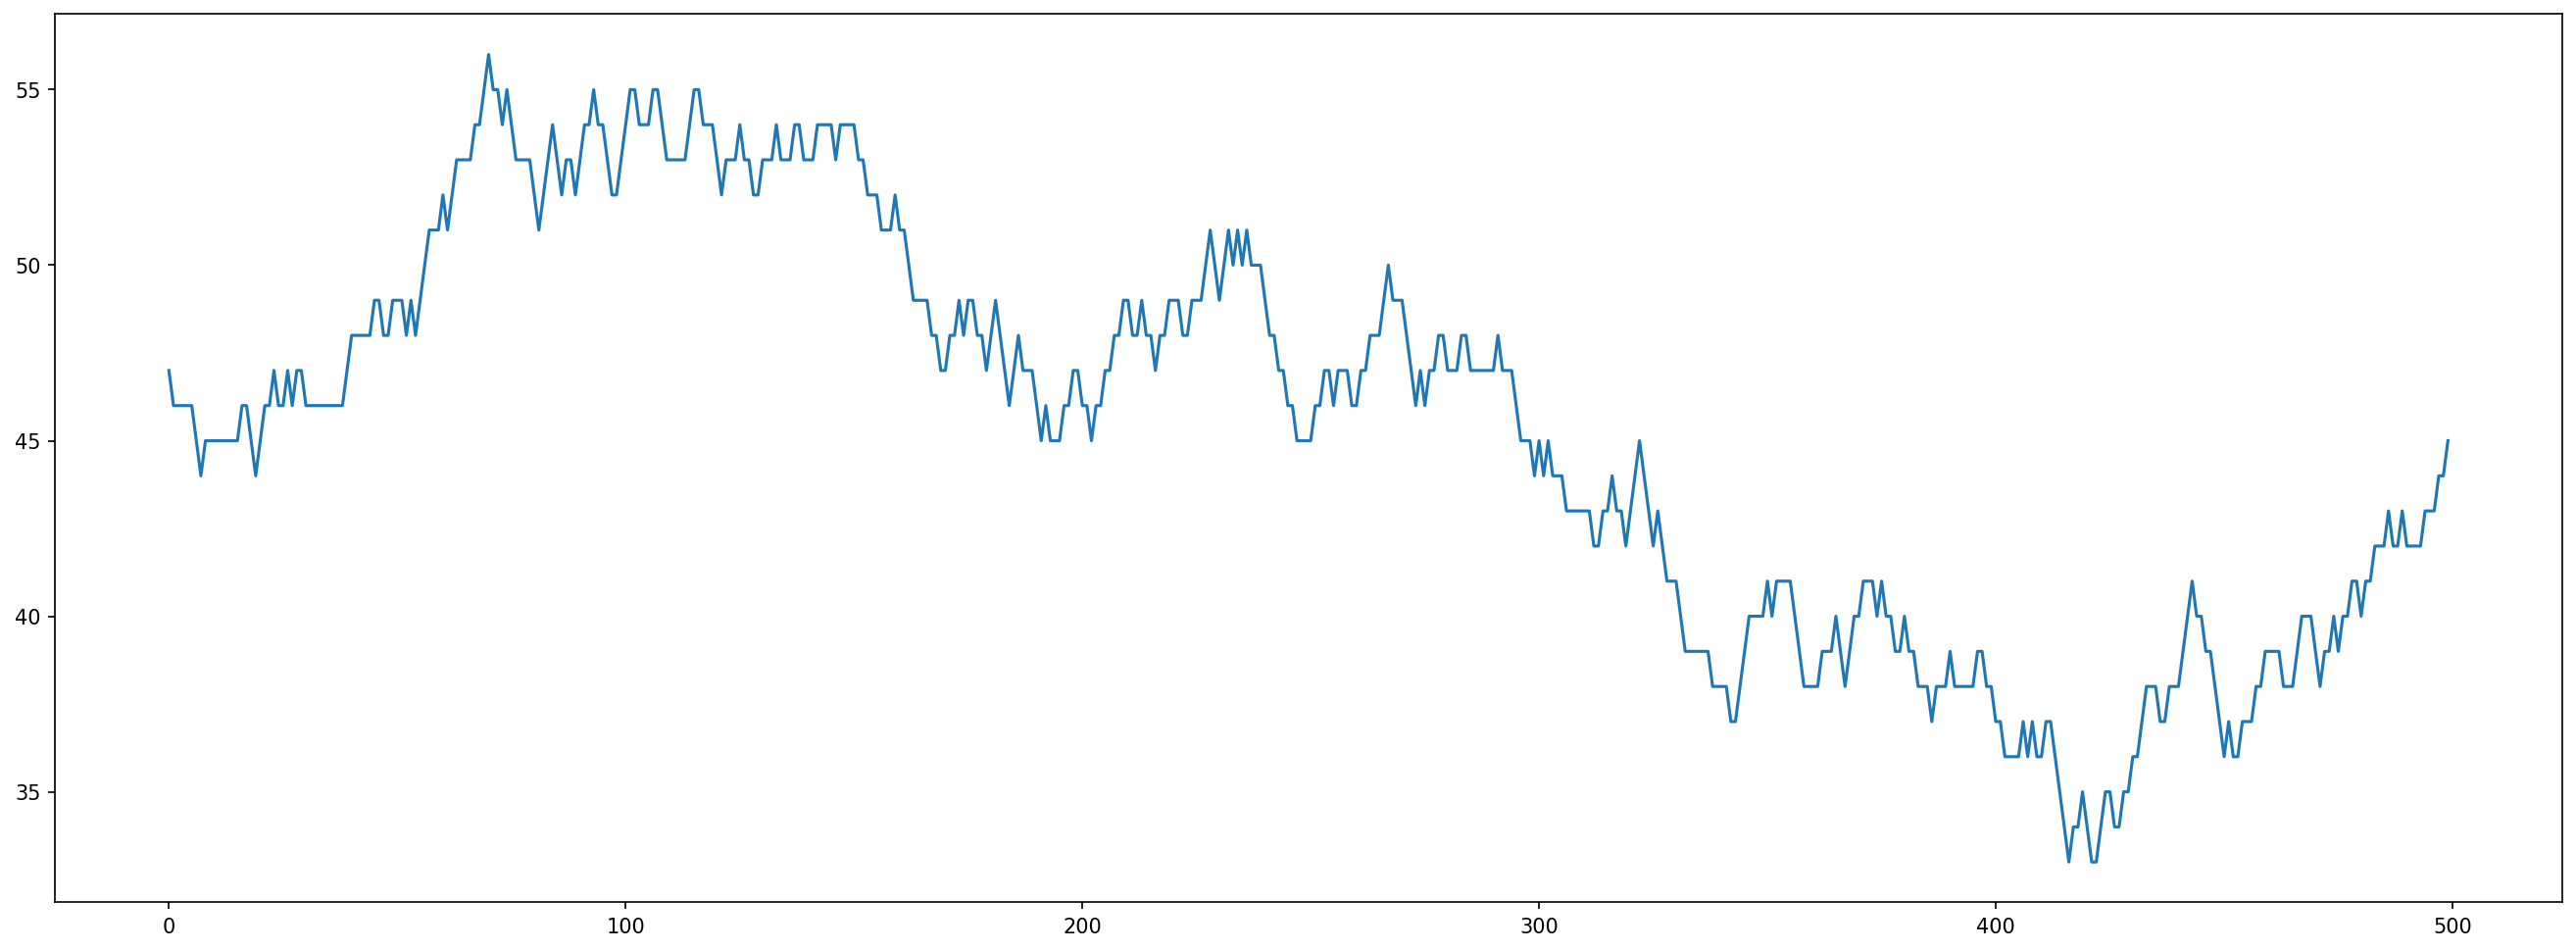

In [52]:
un = 500
plt.figure(figsize=(22, 8), dpi=150)
plt.plot([i for i in range(un)], tn.lh[:un])
plt.show()